In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors
import healpy as hp
import math
from shapely.geometry import Point, Polygon

(3, 4)
[0.0, 0.7453559924999299, 0.7071067811865476, 4.5639891522016886e-17] [0.0, 0.0, 0.7071067811865475, 0.7453559924999299] [1.0, 0.6666666666666666, 0.0, 0.6666666666666666]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
0.04653428396607816 0.0 0.9989166934313213
0.046826715560957514 0.01570523129433701 0.9987795574698977
0.04711149652088611 0.03162946294183866 0.9983887439116956
0.04738799574283258 0.04776492944563727 0.997733877030609
0.04765557415920092 0.06410297813345943 0.996804772483548


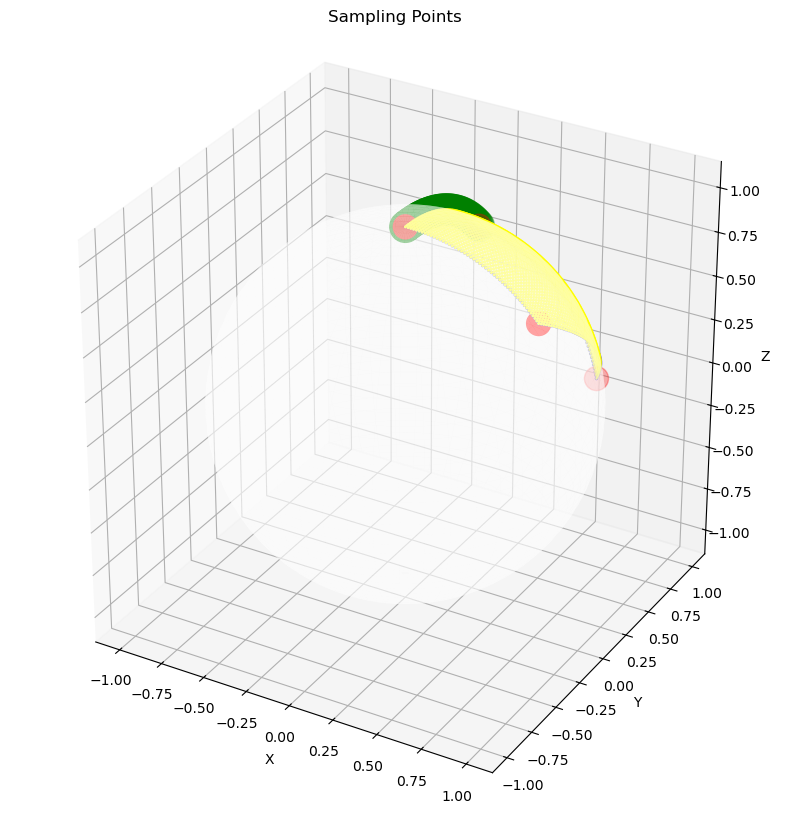

In [53]:
def main(order, i):
  
    # Create points for sphere
    theta = np.linspace(0, 2 * np.pi, 100)
    phi = np.linspace(0, np.pi, 50)
    theta, phi = np.meshgrid(theta, phi)
    r = 1
    # Convert to Cartesian coordinates
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    
    # Plot sphere
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap = mcolors.ListedColormap(['white']), alpha=0.4)
    
    
    points = getBoundaries(order, i)
    ax.scatter(points[0], points[1], points[2], c='red', s=300)
    print(np.shape(points))
  
    print(points[0], points[1],points[2] )
    
    arc12, arc23, arc34, arc41 = getArcs(points)
    # Plot the arcs
    ax.scatter(arc12[:, 0], arc12[:, 1], arc12[:, 2], color='blue', s = 2)
    ax.scatter(arc23[:, 0], arc23[:, 1], arc23[:, 2], color='blue', s =2)
    ax.scatter(arc34[:, 0], arc34[:, 1], arc34[:, 2], color='blue', s =2)
    ax.scatter(arc41[:, 0], arc41[:, 1], arc41[:, 2], color='blue', s = 2)
    # # ax.scatter(arc41[40, 0], arc41[40, 1], arc41[40, 2], color='green', s = 100)
    # # ax.scatter(arc12[40, 0], arc12[40, 1], arc12[40, 2], color='green', s = 100)
    # # ax.scatter(arc23[40, 0], arc23[40, 1], arc23[40, 2], color='green', s = 100)
    # # ax.scatter(arc34[40, 0], arc34[40, 1], arc34[40, 2], color='green', s = 100)
    
    


    new_points, arc_lengths= getPoints(arc12, arc23, arc34, arc41, 50)
    # for i in range(5000):
    #     ax.scatter(new_points[i][0], new_points[i][1], new_points[i][2], c=np.random.rand(3,), s=1)
    print(type(new_points))
    print(type(arc12))
    ax.scatter(new_points[:,0], new_points[:,1], new_points[:,2], color = 'yellow', s=1)
    ax.scatter(new_points[0:50, 0], new_points[0:50,1], new_points[0:50, 2], color='green', s = 500)
    for j in range(5):
        print(new_points[j+150,0], new_points[j+150, 1],new_points[j+150, 2] )
        
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Sampling Points')
    ax.set_box_aspect((1, 1, 1))
    plt.show()
    return arc_lengths

t = main(0,0)

In [26]:
p1 = (0.015705231294337, -0.046826715560957514, 0.9987795574698977)
p2 = (0.031629462941838646, -0.04711149652088611, 0.9983887439116956)

In [27]:
p = (0.0, 0.0 ,1.0)

In [28]:
first = (0.04653428396607816, 0.0, 0.9989166934313213)
second = (0.046826715560957514, 0.01570523129433701, 0.9987795574698977)
third = (0.04711149652088611, 0.03162946294183866, 0.9983887439116956)

In [29]:
spherical(first)

(0.0, 0.04655109488268507)

In [40]:
0 * 180/np.pi

0.0

In [30]:
spherical(second) 

(0.32360077876488963, 0.04941034016454051)

In [38]:
.323 * 180/np.pi

18.50653678272559

In [31]:
spherical(third)

(0.5912548755538106, 0.0567748001378195)

In [39]:
.591 * 180/np.pi

33.86180569223165

In [32]:
spherical_angle_diff(first, second)

(18.540958870374848, 0.1638226872430101)

In [33]:
q = spherical(p1)
q

(-1.2471955480300072, 0.04941034016454051)

In [34]:
diff_in_angle(p1, p2)

(15.335450115391211, 0.421952474861913)

In [35]:
np.shape(t)

(100, 49, 2)

In [36]:
t[0]

array([[90.        ,  0.87744686],
       [ 0.        ,  0.88912772],
       [ 0.        ,  0.90060669],
       [ 0.        ,  0.91185584],
       [ 0.        ,  0.92284663],
       [ 0.        ,  0.93354998],
       [ 0.        ,  0.94393649],
       [ 0.        ,  0.95397652],
       [ 0.        ,  0.96364042],
       [ 0.        ,  0.97289868],
       [ 0.        ,  0.98172213],
       [ 0.        ,  0.99008214],
       [ 0.        ,  0.99795084],
       [ 0.        ,  1.00530131],
       [ 0.        ,  1.01210781],
       [ 0.        ,  1.01834597],
       [ 0.        ,  1.02399302],
       [ 0.        ,  1.02902797],
       [ 0.        ,  1.03343182],
       [ 0.        ,  1.03718769],
       [ 0.        ,  1.04028104],
       [ 0.        ,  1.04269976],
       [ 0.        ,  1.04443432],
       [ 0.        ,  1.04547783],
       [ 0.        ,  1.04582613],
       [ 0.        ,  1.04547783],
       [ 0.        ,  1.04443432],
       [ 0.        ,  1.04269976],
       [ 0.        ,

In [45]:
t[3]

array([[18.73079097,  0.04627036],
       [15.20182944,  0.11469437],
       [11.10406812,  0.160753  ],
       [ 7.91357093,  0.18890627],
       [ 5.72364272,  0.20603494],
       [ 4.25397999,  0.21682056],
       [ 3.25288321,  0.22392015],
       [ 2.55275513,  0.22879931],
       [ 2.04915747,  0.23228398],
       [ 1.67720942,  0.23485692],
       [ 1.39587113,  0.2368115 ],
       [ 1.17853251,  0.23833273],
       [ 1.00748587,  0.23954126],
       [ 0.87064942,  0.24051815],
       [ 0.75958605,  0.24131938],
       [ 0.66827723,  0.24198449],
       [ 0.5923459 ,  0.24254203],
       [ 0.5285525 ,  0.24301302],
       [ 0.47446088,  0.24341317],
       [ 0.42821242,  0.24375442],
       [ 0.38837028,  0.24404595],
       [ 0.35381029,  0.24429496],
       [ 0.32364315,  0.2445071 ],
       [ 0.29715824,  0.24468688],
       [ 0.27378238,  0.24483794],
       [ 0.25304925,  0.24496323],
       [ 0.2345765 ,  0.24506518],
       [ 0.21804822,  0.24514579],
       [ 0.20320167,

In [16]:
math.degrees(.2676541)

15.335450299372487

In [17]:
def getBoundaries(order, i):
    x_coor = []
    y_coor = []
    z_coor = []
    # for i in range(hp.order2npix(order)):
    test = hp.boundaries(hp.order2nside(order), i, step=1)
    x_coor.extend(test[0])
    y_coor.extend(test[1])
    z_coor.extend(test[2])
    
    return x_coor, y_coor, z_coor

In [18]:
def getArcs(points):
    
    p1, p2, p3, p4= np.transpose(points)
    arc12 = great_circle_arc(p1, p2)
    arc23 = great_circle_arc(p2, p3)
    arc34 = great_circle_arc(p3, p4)
    arc41 = great_circle_arc(p4, p1)
    
    return arc12, arc23, arc34, arc41
    

In [19]:
def getPoints(arc12, arc23, arc34, arc41, num_points = 50):
    new_points = []
    all_arc_lengths = []
    
    #This function returns arcs both from top to bottom as well as side to side
    for i in range(num_points):
        arc = great_circle_arc(arc12[i], arc34[num_points - 1 - i])
        new_points.extend(arc)
        arc_lengths=[]
        for j in range(49):
            arc_lengths.append(spherical_angle_diff(arc[j], arc[j+1]))
        all_arc_lengths.append(arc_lengths)
    for i in range(num_points):
        arc = great_circle_arc(arc23[i], arc41[num_points -1 - i])
        new_points.extend(arc)
        arc_lengths=[]
        for j in range(49):
            arc_lengths.append(spherical_angle_diff(arc[j], arc[j+1]))
        all_arc_lengths.append(arc_lengths)


    

                
                    
    return np.array(new_points), np.array(all_arc_lengths)

In [20]:
def great_circle_arc(p1, p2, num_points=50):
    """Generates points along a great circle arc between two points."""
    p1_norm = p1 / np.linalg.norm(p1)
    p2_norm = p2 / np.linalg.norm(p2)
    points = []
    for i in range(num_points):
        t = i / (num_points - 1)
        # Linear interpolation and normalization
        pt = (1 - t) * p1_norm + t * p2_norm
        pt_norm = pt / np.linalg.norm(pt)
        points.append(pt_norm)
    return np.array(points)

In [21]:
def diff_in_angle(p1, p2):
   new_p1 = spherical(p1)
   new_p2 = spherical(p2)
   theta= abs(math.degrees(new_p1[0]) - math.degrees(new_p2[0]))
   phi = abs(math.degrees(new_p1[1]) - math.degrees(new_p2[1]))
   return theta, phi

In [22]:
def spherical(point):
    return np.arctan2(point[1], point[0]), np.arccos(point[2])

In [23]:
import math

def spherical_angle_diff(point1, point2):
    """
    Calculates the difference in theta and phi angles between two points on a sphere given their Cartesian coordinates.

    Args:
        point1: A tuple of length 3 representing the Cartesian coordinates of the first point.
        point2: A tuple of length 3 representing the Cartesian coordinates of the second point.

    Returns:
        A tuple containing the difference in theta and phi angles.
    """
    
    def to_spherical(point):
        x, y, z = point
        r = math.sqrt(x**2 + y**2 + z**2)
        theta = math.atan2(y, x)
        phi = math.acos(z / r)
        return theta, phi

    theta1, phi1 = to_spherical(point1)
    theta2, phi2 = to_spherical(point2)

    return (theta2 - theta1) *180/np.pi, (phi2 - phi1)*180/np.pi

In [24]:
spherical_angle_diff(p1, p2)

(15.335450115391216, 0.4219524748619131)